# Semantic Function Species

In [1]:
from scripts.imports import *

out = Exporter(
    paths['outdir'], 
    'semantics'
)

In [2]:
df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'head_utf8',
       'funct_type', 'function', 'quality', 'name', 'text', 'n_times',
       'n_slots', 'lex_token', 'is_advb', 'tense', 'firstw', 'genre', 'domain',
       'gendom', 'clause', 'sentence', 'cl_rela', 'cl_type', 'cl_kind', 'verb',
       'verb_etcbc', 'verb_utf8', 'verb_text', 'verbform', 'verb_stem',
       'cl_args', 'has_objc', 'has_cmpl', 'has_subj', 'has_oc',
       'Time Position', 'cl_type2', 'cl_nsuccs', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'unmodified', 'modtag', 'modtag2',
       'front', 'ph_type', 'has_time', 'notes', 'main_genre', 'APPO', 'DEF',
       'ORDN', 'ØPP', 'GP', 'QUANT', 'PL', 'NUM', 'PARA', 'DEMON',
       'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC', 'SFX3', 'SFX', 'DU', 'SFX1',
       'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [3]:
df.shape

(3648, 78)

# ! TODO ! : Clean these up!

* Check on KL HJWM and equivalents; Haspelmath suggests that 'every' be rendered as equivalent to "[in] every February"; I have tagged these as habituals; i.e. habital simultaneous—maybe that is right. But I should be sure. Also, where might KL indicate a duration instead?
* מתי look at this ehad with simul L; prob remove it
* todo: remove 472789 as this is emotive, not a location
* disambig one case of `atelic_ext, simultaneous` which shouldn't be there
* disambig one case of `habitual, multi_simul`
* change name of anterior_dist to dist_past + anterior
* change name of distfut_ext to dist_fut + atelic_ext

In [4]:
ALL_funct_cts = df.function.value_counts()

ALL_funct_cts

simultaneous                                 1947
atelic_ext                                    576
anterior_dur                                  434
posterior                                     224
posterior_dur                                  67
habitual                                       62
begin_to_end                                   55
purposive_ext                                  34
anterior                                       32
simultaneous + atelic_ext                      24
regular_recurrence                             18
multi_simuls                                   18
anterior_dur_purposive                         15
telic_ext                                      14
anterior_dur_past?                              7
dist_posterior                                  6
simul_to_end                                    6
dist_fut                                        6
begin_to_end_habitual                           6
habitual?                                       6


In [78]:
df[df.verse == 'Amos 1:1']['function']

node
486672    simultaneous + anterior_dist
Name: function, dtype: object

In [5]:
out.number(
    ALL_funct_cts.shape[0],
    'ALL_funct_unique',
)

'73'

In [6]:
out.text(
    '; '.join(ALL_funct_cts.index).replace('_', '\_'),
    'ALL_funct_tags',
)

'simultaneous; atelic\\_ext; anterior\\_dur; posterior; posterior\\_dur; habitual; begin\\_to\\_end; purposive\\_ext; anterior; simultaneous + atelic\\_ext; regular\\_recurrence; multi\\_simuls; anterior\\_dur\\_purposive; telic\\_ext; anterior\\_dur\\_past?; dist\\_posterior; simul\\_to\\_end; dist\\_fut; begin\\_to\\_end\\_habitual; habitual?; anterior\\_limitive; dur\\_to\\_end; atelic\\_ext?; anterior\\_limitive?; multi\\_antdur; posterior + atelic\\_ext; atelic\\_ext + simultaneous; regular\\_recurrence?; posterior\\_simul; dist\\_past; dist\\_prospective; purposive; purposive?; purposive\\_ext?; anterior\\_dur + duration; multi\\_posterior\\_dur; habitual + begin\\_to\\_end; simultaneous + purposive\\_ext; anterior\\_dur + anterior; atelic\\_ext + anterior + atelic\\_ext; simultaneous + anterior; posterior\\_dur\\_future; anterior\\_ext; anterior\\_dur\\_except; atelic\\_ext, simultaneous; simultaneous + multi\\_begin\\_to\\_end; multi\\_atelic\\_ext; posterior\\_dist; dist\\_fut

In [7]:
out.number(
    ALL_funct_cts['dist_posterior'],
    'N_dist_posterior'
)

'6'

In [8]:
df[df.function == 'dist_posterior']['verse']

node
457809    1_Samuel 30:12
463357      1_Kings 15:5
474066     Jeremiah 2:32
492838      Psalms 55:20
493817       Psalms 74:2
505558       Esther 4:11
Name: verse, dtype: object

In [9]:
ts.show(
    df[df.function=='posterior_dist']
, extra=['function'])

showing 1 of 1


,verse,clause,function
node,,,
428448,Genesis 11:10,וַיֹּ֖ולֶד אֶת־אַרְפַּכְשָׁ֑ד שְׁנָתַ֖יִם אַחַ֥ר הַמַּבּֽוּל׃,posterior_dist


In [76]:
ts.show(
    df[df.function=='anterior_dist']
, extra=['function'])

showing 1 of 1


,verse,clause,function
node,,,
442303,Numbers 13:22,וְחֶבְרֹ֗ון שֶׁ֤בַע שָׁנִים֙ נִבְנְתָ֔ה לִפְנֵ֖י צֹ֥עַן מִצְרָֽיִם׃,anterior_dist


In [10]:
ts.show(
    df[df.function=='anterior_dur_past?']
, extra=['function'])

showing 7 of 7


,verse,clause,function
node,,,
445951,Deuteronomy 9:7,לְמִן־הַיֹּ֞ום מַמְרִ֥ים הֱיִיתֶ֖ם עִם־יְהוָֽה׃,anterior_dur_past?
453457,Judges 18:29,וְאוּלָ֛ם לַ֥יִשׁ שֵׁם־הָעִ֖יר לָרִאשֹׁנָֽה׃,anterior_dur_past?
458669,2_Samuel 7:11,וּלְמִן־הַיֹּ֗ום,anterior_dur_past?
467457,2_Kings 19:25,אֹתָ֣הּ עָשִׂ֔יתִי לְמִ֥ימֵי קֶ֖דֶם,anterior_dur_past?
471017,Isaiah 37:26,הֲלֹֽוא־שָׁמַ֤עְתָּ לְמֵֽרָחֹוק֙,anterior_dur_past?
509791,Nehemiah 13:19,אֲשֶׁר֙ לֹ֣א יִפְתָּח֔וּם עַ֖ד אַחַ֣ר הַשַּׁבָּ֑ת,anterior_dur_past?
511287,1_Chronicles 17:10,וּלְמִיָּמִ֗ים,anterior_dur_past?


## Count Function Types

In [11]:
functype_ct = df.funct_type.value_counts()
functype_pr = functype_ct / functype_ct.sum()
functype_cp = join_ct_pr(functype_ct, functype_pr)

out.table(
    functype_cp,
    'ALL_functype_cp',
    caption='Function Type Counts',
)

,count,percent
main,3365,92%
compound,156,4%
secondary,88,2%
ambiguous,39,1%


## Main Function Analysis

In [12]:
df_main = df[df.funct_type=='main']

out.number(
    df_main.shape[0],
    'total_main_fc'
)

'3,365'

In [13]:
# get a freq count
funct_ct = df_main.function.value_counts(ascending=False)
funct_pr = (funct_ct / funct_ct.sum())
funct_pr_str = (funct_pr.round(2) * 100).astype(int).astype(str) + '%'
funct_vals = pd.concat([funct_ct, funct_pr_str], 1).T\
    .set_axis(['freq.', 'perc.'], 0)\

out.table(
    funct_vals,
    'funct_counts',
    caption='Frequencies of Primary Time Functions',
    adjustbox=True,
)

funct_vals

,simultaneous,atelic_ext,anterior_dur,posterior,posterior_dur,habitual,anterior,telic_ext,dist_fut,dist_past
freq.,1947,576,434,224,67,62,32,14,6,3
perc.,57%,17%,13%,7%,2%,2%,1%,0%,0%,0%


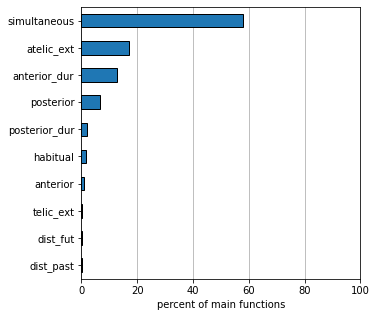

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
funct_pr.sort_values().mul(100).plot(kind='barh', ax=ax, edgecolor='black')
ax.set_xlabel('percent of main functions')
ax.grid(axis='x')
ax.set_axisbelow(True)
ax.set_xlim(0, 100)
out.plot(
    'bar_funct_perc',
)

In [15]:
top4_perc = 100*funct_pr.loc['simultaneous':'posterior'].sum()
out.number(
    top4_perc,
    'top4_perc',
)

top4_perc

94.53194650817235

In [16]:
# export numbers for each main
for funct in funct_vals.columns:
    Nfunct = funct_vals[funct]['freq.']
    Pfunct = funct_vals[funct]['perc.'].replace('%', '')
    out.number(Nfunct, f'N_{funct}')
    out.text(Pfunct, f'P_{funct}')

## All Functions Phrase Type

In [17]:
allf_pht_ct = df.ph_type.value_counts()
allf_pht_pr = allf_pht_ct / allf_pht_ct.sum()
allf_pht_cp = join_ct_pr(allf_pht_ct, allf_pht_pr)

out.table(
    allf_pht_cp,
    'allf_pht_cp',
    caption='Phrase Type Counts for All Functions',
)

,count,percent
PP,2190,60%
NP,913,25%
ADVB,545,15%


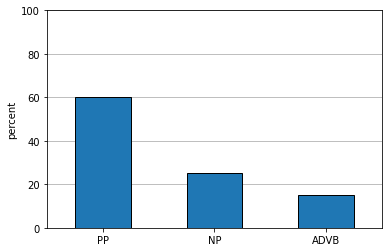

In [18]:
fig, ax = plt.subplots()
allf_pht_pr.mul(100).plot(kind='bar', edgecolor='black')
ax.set_ylabel('percent')
ax.set_ylim((0,100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
out.plot(
    'bar_allfptype_pc',
)

## Phrase Type Associations by Function

In [19]:
funcpt_ct = pivot_ct(
    df_main,
    'function',
    'ph_type',
)

funcpt_pr = funcpt_ct.div(funcpt_ct.sum(1),0)

out.table(
    funcpt_ct,
    'funcpt_ct',
    caption='Phrase Type Counts by Function'
)

ph_type,PP,NP,ADVB
function,,,
simultaneous,1196,293,458
atelic_ext,9,521,46
anterior_dur,434,0,0
posterior,190,0,34
posterior_dur,67,0,0
habitual,42,20,0
anterior,28,0,4
telic_ext,8,6,0
dist_fut,6,0,0


In [20]:
out.table(
    funcpt_pr.mul(100).round().astype(int).astype(str)+'%',
    'funcpt_pr',
    caption='Phrase Type Percentages by Function'
)

ph_type,PP,NP,ADVB
function,,,
simultaneous,61%,15%,24%
atelic_ext,2%,90%,8%
anterior_dur,100%,0%,0%
posterior,85%,0%,15%
posterior_dur,100%,0%,0%
habitual,68%,32%,0%
anterior,88%,0%,12%
telic_ext,57%,43%,0%
dist_fut,100%,0%,0%


In [21]:
funcpt_dp = sig.apply_deltaP(funcpt_ct, 0, 1)

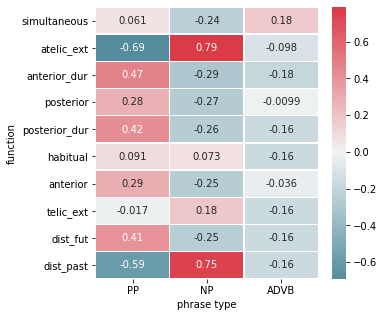

In [22]:
fig,ax = plt.subplots(figsize=(5,5))
heatmap(funcpt_dp, ax=ax, annot=True, square=False)
ax.set_xlabel('phrase type')

out.plot(
    'heat_funcphtype',
)

## Main Function Modifiers

In [23]:
afmod_ct = pivot_ct(
    df_main,
    'function',
    'modtag',
)

afmod_ct = afmod_ct.loc[:, afmod_ct.sum() > 10]

out.table(
    afmod_ct.iloc[:,:10],
    'afmod_ct',
    caption='Top Ten Modifier Counts by Function',
    adjustbox=True,
)

modtag,DEF,DEMON,C,NUM+PL,NUM,ORDN,SFX,PL+C,PL+DEMON,KL+DEF
function,,,,,,,,,,
simultaneous,438,353,219,2,38,173,29,45,41,0
atelic_ext,2,0,6,162,117,0,0,2,1,55
anterior_dur,61,60,24,0,4,3,0,4,2,0
posterior,4,1,15,15,9,0,40,1,12,0
habitual,23,0,3,2,1,0,0,0,0,0
posterior_dur,4,3,0,0,1,1,0,10,0,0
telic_ext,0,0,0,2,10,0,0,0,0,0
anterior,1,0,0,0,0,0,9,0,1,0
dist_fut,0,0,0,5,1,0,0,0,0,0


In [24]:
afmod_pr = afmod_ct.div(afmod_ct.sum(1), 0)
afmod_pc = afmod_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    afmod_pc.iloc[:,:10],
    'afmod_pc',
    caption='Modifier Percent of Function (Top Ten)',
    adjustbox=True
)

modtag,DEF,DEMON,C,NUM+PL,NUM,ORDN,SFX,PL+C,PL+DEMON,KL+DEF
function,,,,,,,,,,
simultaneous,31%,25%,16%,0%,3%,12%,2%,3%,3%,0%
atelic_ext,0%,0%,1%,35%,25%,0%,0%,0%,0%,12%
anterior_dur,38%,38%,15%,0%,2%,2%,0%,2%,1%,0%
posterior,4%,1%,14%,14%,8%,0%,38%,1%,11%,0%
habitual,53%,0%,7%,5%,2%,0%,0%,0%,0%,0%
posterior_dur,17%,12%,0%,0%,4%,4%,0%,42%,0%,0%
telic_ext,0%,0%,0%,17%,83%,0%,0%,0%,0%,0%
anterior,9%,0%,0%,0%,0%,0%,82%,0%,9%,0%
dist_fut,0%,0%,0%,83%,17%,0%,0%,0%,0%,0%


In [25]:
afmod_dp = sig.apply_deltaP(afmod_ct, 0, 1)

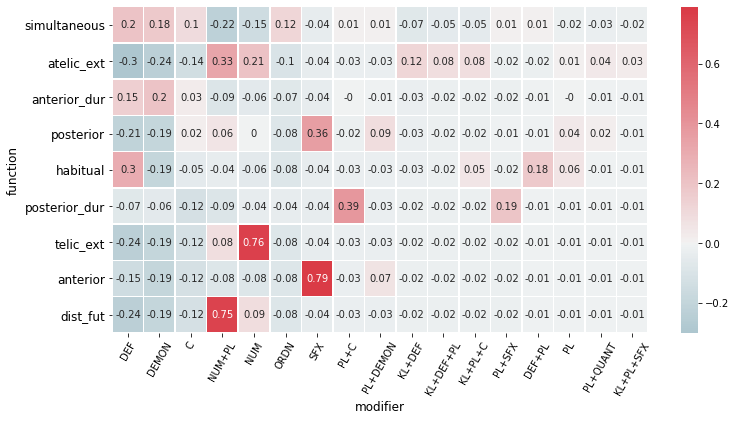

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
heatmap(afmod_dp.round(2), square=False, ax=ax, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
ax.set_ylabel('function', size=12)
ax.set_xlabel('modifier', size=12)

out.plot(
    'heat_afmod_dp',
)

# Export All Fronts

In [27]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'], 
}

funct2data = {}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    funct_df = df_main[df_main.function == function]
    front_cts = pd.DataFrame(
        funct_df['front'].value_counts()
    )
    front_cts = front_cts.rename_axis(index='front').set_axis(['count'], 1)
    front_prs = front_cts / front_cts.sum()
    front_cp = join_ct_pr(front_cts, front_prs)
    
    funct2data[function] = {
        'df': funct_df,
        'ct':front_cts,
        'pr':front_prs,
        'cp':front_cp,
    }
    
    print(function)
    display(
        out.table(
            front_cp,
            f'{abbrev}_front',
            caption=f'Attested {full} Forms in Sample',
            hebindex=True,
        )
    )

simultaneous


,count,percent
\texthebrew{ב},1081,56%
\texthebrew{עתה},349,18%
\texthebrew{Ø},293,15%
\texthebrew{אז},64,3%
\texthebrew{ל},42,2%
\texthebrew{כ},35,2%
\texthebrew{מחר},32,2%
\texthebrew{ב+אחרית},15,1%
\texthebrew{בין},7,0%
\texthebrew{יומם},5,0%


anterior_dur


,count,percent
\texthebrew{עד},279,64%
\texthebrew{ל},152,35%
\texthebrew{עד+ל},3,1%


anterior


,count,percent
\texthebrew{ל+פנה},27,84%
\texthebrew{טרם},4,12%
\texthebrew{ל+פנה+מן},1,3%


atelic_ext


,count,percent
\texthebrew{Ø},521,90%
\texthebrew{תמיד},31,5%
\texthebrew{יומם},13,2%
\texthebrew{ל},5,1%
\texthebrew{כ},2,0%
\texthebrew{את},2,0%
\texthebrew{נצח},1,0%
\texthebrew{רביעי},1,0%


habitual


,count,percent
\texthebrew{ל},21,34%
\texthebrew{Ø},20,32%
\texthebrew{ב},17,27%
\texthebrew{מן},3,5%
\texthebrew{בין},1,2%


posterior


,count,percent
\texthebrew{אחר},161,72%
\texthebrew{מן},32,14%
\texthebrew{מן+קץ},18,8%
\texthebrew{מן+קצה},10,4%
\texthebrew{מן+אחר},2,1%
\texthebrew{מן+קצת},1,0%


posterior_dur


,count,percent
\texthebrew{מן},64,96%
\texthebrew{מן+תחלה},1,1%
\texthebrew{מן+ל},1,1%
\texthebrew{ל+מן},1,1%


telic_ext


,count,percent
\texthebrew{ב},8,57%
\texthebrew{Ø},6,43%


dist_fut


,count,percent
\texthebrew{ב},6,100%


dist_past


,count,percent
\texthebrew{Ø},3,100%


## Export Numbers / Data

### Simultaneous

In [28]:
simdf = funct2data['simultaneous']['df']

In [29]:
out.number(
    funct2data['simultaneous']['pr'].loc['ב'][0]*100,
    'perc_sim_B'
)

'56'

In [30]:
get = 'Ø'
out.number(
    funct2data['simultaneous']['pr'].loc[get][0]*100,
    'perc_sim_Ø'
)

'15'

In [31]:
nulldef_ct = simdf[simdf.front == 'Ø'].DEF.value_counts()
nulldef_pr = nulldef_ct / nulldef_ct.sum()

nulldef_pr

1.0    0.83959
0.0    0.16041
Name: DEF, dtype: float64

In [32]:
out.number(
    nulldef_pr[1]*100,
    'nulldef_pr'
)

'84'

#

In [33]:
null_nodef = simdf[
    (simdf.front == 'Ø')
    & (simdf.DEF == 0)
]

out.number(
    null_nodef.shape[0],
    'n_null_nodef'
)

ts.show(
    null_nodef
, extra=['function', 'times_utf8'], spread=10)

showing 10 of 47


,verse,clause,function,times_utf8
node,,,,
428652,Genesis 14:4,וּשְׁלֹשׁ־עֶשְׂרֵ֥ה שָׁנָ֖ה מָרָֽדוּ׃,simultaneous,שׁנה
442052,Numbers 11:9,בְרֶ֧דֶת הַטַּ֛ל עַל־הַֽמַּחֲנֶ֖ה לָ֑יְלָה,simultaneous,לילה
452297,Judges 9:32,ק֣וּם לַ֔יְלָה אַתָּ֖ה וְהָעָ֣ם,simultaneous,לילה
457391,1_Samuel 26:7,וַיָּבֹא֩ דָוִ֨ד וַאֲבִישַׁ֥י׀ אֶל־הָעָם֮ לַיְלָה֒,simultaneous,לילה
465833,2_Kings 7:12,וַיָּ֨קָם הַמֶּ֜לֶךְ לַ֗יְלָה,simultaneous,לילה
485724,Hosea 4:5,וְכָשַׁ֧ל גַּם־נָבִ֛יא עִמְּךָ֖ לָ֑יְלָה,simultaneous,לילה
490340,Psalms 5:4,בֹּ֖קֶר תִּשְׁמַ֣ע קֹולִ֑י,simultaneous,בקר
493512,Psalms 69:14,תְפִלָּתִֽי־לְךָ֨׀ עֵ֤ת רָצֹ֗ון,simultaneous,עת
499835,Job 34:25,וְהָ֥פַךְ לַ֝֗יְלָה,simultaneous,לילה


In [34]:
nndef_timects = null_nodef.times_utf8.value_counts()
nndef_timeprs = nndef_timects / nndef_timects.sum()

nndef_timects

לילה       31
יום         5
בקר         3
עת          2
שׁנה        1
רגע|יום     1
חדשׁ        1
צהרים       1
רגע         1
מחר|עת      1
Name: times_utf8, dtype: int64

In [35]:
out.number(
    nndef_timeprs['לילה']*100,
    'nndef_night_pr',
)

'66'

In [36]:
out.number(
    nndef_timects['לילה'],
    'nndef_night_ct',
)

'31'

In [37]:
out.number(
    nndef_timects['יום'],
    'nndef_day_ct',
)

'5'

In [38]:
out.number(
    nndef_timects['בקר'],
    'nndef_morning_ct',
)

'3'

### Anterior

In [39]:
antdf = df_main[df_main.function == 'anterior']

In [40]:
funct2data['anterior']['ct']

,count
front,
ל+פנה,27
טרם,4
ל+פנה+מן,1


In [41]:
ts.show(
    antdf[antdf.SFX == 1]
)

showing 9 of 9


,verse,clause
node,,
430247,Genesis 27:7,וַאֲבָרֶכְכָ֛ה לִפְנֵ֥י יְהוָ֖ה לִפְנֵ֥י מֹותִֽי׃
430258,Genesis 27:10,בַּעֲבֻ֛ר אֲשֶׁ֥ר יְבָרֶכְךָ֖ לִפְנֵ֥י מֹותֹֽו׃
430797,Genesis 30:30,אֲשֶׁר־הָיָ֨ה לְךָ֤ לְפָנַי֙
433499,Genesis 50:16,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו
434635,Exodus 10:14,לְ֠פָנָיו לֹא־הָ֨יָה כֵ֤ן אַרְבֶּה֙ כָּמֹ֔הוּ
461659,1_Kings 3:12,אֲשֶׁ֤ר כָּמֹ֨וךָ֙ לֹא־הָיָ֣ה לְפָנֶ֔יךָ
467924,2_Kings 23:25,וְכָמֹהוּ֩ לֹֽא־הָיָ֨ה לְפָנָ֜יו מֶ֗לֶךְ
504486,Ecclesiastes 9:1,אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃
511707,1_Chronicles 22:5,וַיָּ֧כֶן דָּוִ֛יד לָרֹ֖ב לִפְנֵ֥י מֹותֹֽו׃


In [42]:
ts.show(
    antdf[antdf.times_etcbc == 'VRM/']
)

showing 4 of 4


,verse,clause
node,,
427693,Genesis 2:5,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָאָ֔רֶץ
427694,Genesis 2:5,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח
434600,Exodus 10:7,הֲטֶ֣רֶם תֵּדַ֔ע
448860,Joshua 2:8,טֶ֣רֶם יִשְׁכָּב֑וּן


In [43]:
antdf[antdf.front.str.startswith('ל+פנה')].modtag2.value_counts()

Ø           16
SFX          9
KL           1
DEF          1
PL+DEMON     1
Name: modtag2, dtype: int64

In [44]:
ts.show(
    antdf[
        (antdf.front.str.startswith('ל+פנה'))
        & (antdf.modtag2 == 'SFX')
    ]
)

showing 9 of 9


,verse,clause
node,,
430247,Genesis 27:7,וַאֲבָרֶכְכָ֛ה לִפְנֵ֥י יְהוָ֖ה לִפְנֵ֥י מֹותִֽי׃
430258,Genesis 27:10,בַּעֲבֻ֛ר אֲשֶׁ֥ר יְבָרֶכְךָ֖ לִפְנֵ֥י מֹותֹֽו׃
430797,Genesis 30:30,אֲשֶׁר־הָיָ֨ה לְךָ֤ לְפָנַי֙
433499,Genesis 50:16,אָבִ֣יךָ צִוָּ֔ה לִפְנֵ֥י מֹותֹ֖ו
434635,Exodus 10:14,לְ֠פָנָיו לֹא־הָ֨יָה כֵ֤ן אַרְבֶּה֙ כָּמֹ֔הוּ
461659,1_Kings 3:12,אֲשֶׁ֤ר כָּמֹ֨וךָ֙ לֹא־הָיָ֣ה לְפָנֶ֔יךָ
467924,2_Kings 23:25,וְכָמֹהוּ֩ לֹֽא־הָיָ֨ה לְפָנָ֜יו מֶ֗לֶךְ
504486,Ecclesiastes 9:1,אֵ֤ין יֹודֵ֨עַ֙ הָֽאָדָ֔ם הַכֹּ֖ל לִפְנֵיהֶֽם׃
511707,1_Chronicles 22:5,וַיָּ֧כֶן דָּוִ֛יד לָרֹ֖ב לִפְנֵ֥י מֹותֹֽו׃


In [45]:
ts.show(
    antdf[
        (antdf.front.str.startswith('ל+פנה'))
        & (antdf.modtag2 == 'Ø')
    ]
)

showing 16 of 16


,verse,clause
node,,
445097,Deuteronomy 2:10,הָאֵמִ֥ים לְפָנִ֖ים יָ֣שְׁבוּ בָ֑הּ עַ֣ם גָּדֹ֥ול וְרַ֛ב וָרָ֖ם כָּעֲנָקִֽים׃
445100,Deuteronomy 2:12,וּבְשֵׂעִ֞יר יָשְׁב֣וּ הַחֹרִים֮ לְפָנִים֒
445130,Deuteronomy 2:20,רְפָאִ֤ים יָֽשְׁבוּ־בָהּ֙ לְפָנִ֔ים
449937,Joshua 11:10,לְפָנִ֔ים הִ֕יא רֹ֖אשׁ כָּל־הַמַּמְלָכֹ֥ות הָאֵֽלֶּה׃
450174,Joshua 14:15,וְשֵׁ֨ם חֶבְרֹ֤ון לְפָנִים֙ קִרְיַ֣ת אַרְבַּ֔ע
450227,Joshua 15:15,וְשֵׁם־דְּבִ֥ר לְפָנִ֖ים קִרְיַת־סֵֽפֶר׃
451135,Judges 1:10,וְשֵׁם־חֶבְרֹ֥ון לְפָנִ֖ים קִרְיַ֣ת אַרְבַּ֑ע
451138,Judges 1:11,וְשֵׁם־דְּבִ֥יר לְפָנִ֖ים קִרְיַת־סֵֽפֶר׃
451182,Judges 1:23,וְשֵׁם־הָעִ֥יר לְפָנִ֖ים לֽוּז׃


In [46]:
ts.show(
    antdf[
        (antdf.front.str.startswith('ל+פנה'))
        & (antdf.modtag2 == 'KL')
    ]
)

showing 1 of 1


,verse,clause
node,,
498047,Job 8:12,וְלִפְנֵ֖י כָל־חָצִ֣יר יִיבָֽשׁ׃


In [47]:
ts.show(
    antdf[
        (antdf.front.str.startswith('ל+פנה'))
        & (antdf.modtag2 == 'PL+DEMON')
    ]
)

showing 1 of 1


,verse,clause
node,,
489450,Zechariah 8:10,כִּ֗י לִפְנֵי֙ הַיָּמִ֣ים הָהֵ֔ם שְׂכַ֤ר הָֽאָדָם֙ לֹ֣א נִֽהְיָ֔ה


In [48]:
ts.show(
    antdf[
        (antdf.front.str.startswith('ל+פנה'))
        & (antdf.modtag2 == 'DEF')
    ]
)

showing 1 of 1


,verse,clause
node,,
509787,Nehemiah 13:19,כַּאֲשֶׁ֣ר צָֽלֲלוּ֩ שַׁעֲרֵ֨י יְרוּשָׁלִַ֜ם לִפְנֵ֣י הַשַּׁבָּ֗ת


### Posterior

In [49]:
postdf = funct2data['posterior']['df']

In [50]:
postmod_ct = postdf.modtag2.value_counts()

postmod_ct

Ø           111
SFX          40
C            15
NUM+PL       15
PL+DEMON     12
NUM           9
PL            5
DEF           4
PL+QUANT      3
KL            2
KL+SFX        1
PL+C          1
DEMON         1
QUANT+PL      1
PL+SFX        1
Name: modtag2, dtype: int64

In [58]:
single_sfx = postdf[
        (postdf.SFX == 1)
        & (postdf.n_slots == 1)
]

out.number(
    single_sfx.shape[0],
    'N_singpost_sfx'
)

out.number(
    100*(single_sfx.shape[0] / postdf.shape[0]),
    'pc_singpost_sfx'
)

ts.show(
    single_sfx
)

showing 25 of 33


,verse,clause
node,,
432150,Genesis 41:3,וְהִנֵּ֞ה שֶׁ֧בַע פָּרֹ֣ות אֲחֵרֹ֗ות עֹלֹ֤ות אַחֲרֵיהֶן֙ מִן־הַיְאֹ֔ר רָעֹ֥ות מַרְאֶ֖ה וְדַקֹּ֣ות בָּשָׂ֑ר
433230,Genesis 48:6,אֲשֶׁר־הֹולַ֥דְתָּ אַחֲרֵיהֶ֖ם
434636,Exodus 10:14,וְאַחֲרָ֖יו לֹ֥א יִֽהְיֶה־כֵּֽן׃
452422,Judges 10:3,וַיָּ֣קָם אַחֲרָ֔יו יָאִ֖יר הַגִּלְעָדִ֑י
452709,Judges 12:11,וַיִּשְׁפֹּ֤ט אַֽחֲרָיו֙ אֶת־יִשְׂרָאֵ֔ל אֵילֹ֖ון הַזְּבֽוּלֹנִ֑י
452713,Judges 12:13,וַיִּשְׁפֹּ֥ט אַחֲרָ֖יו אֶת־יִשְׂרָאֵ֑ל עַבְדֹּ֥ון בֶּן־הִלֵּ֖ל הַפִּרְעָתֹונִֽי׃
457117,1_Samuel 24:22,אִם־תַּכְרִ֥ית אֶת־זַרְעִ֖י אַֽחֲרָ֑י
467203,2_Kings 18:5,וְאַחֲרָ֞יו לֹא־הָיָ֣ה כָמֹ֗הוּ בְּכֹל֙ מַלְכֵ֣י יְהוּדָ֔ה
467926,2_Kings 23:25,וְאַחֲרָ֖יו לֹֽא־קָ֥ם כָּמֹֽהוּ׃


In [59]:
single_post =     postdf[
        (postdf.modtag2 == 'Ø')
        & (postdf.n_slots == 1)
    ]

out.number(
    single_post.shape[0],
    'N_single_post'
)


out.number(
    100*(single_post.shape[0] / postdf.shape[0]),
    'pc_singpost'
)

ts.show(
    single_post
)

showing 25 of 34


,verse,clause
node,,
428380,Genesis 10:18,וְאַחַ֣ר נָפֹ֔צוּ מִשְׁפְּחֹ֖ות הַֽכְּנַעֲנִֽי׃
429913,Genesis 24:55,אַחַ֖ר תֵּלֵֽךְ׃
430763,Genesis 30:21,וְאַחַ֖ר יָ֣לְדָה בַּ֑ת
431951,Genesis 38:30,וְאַחַר֙ יָצָ֣א אָחִ֔יו
433994,Exodus 5:1,וְאַחַ֗ר בָּ֚אוּ מֹשֶׁ֣ה וְאַהֲרֹ֔ן
439236,Leviticus 14:8,וְאַחַ֖ר יָבֹ֣וא אֶל־הַֽמַּחֲנֶ֑ה
439506,Leviticus 15:28,וְאַחַ֥ר תִּטְהָֽר׃
440180,Leviticus 22:7,וְאַחַר֙ יֹאכַ֣ל מִן־הַקֳּדָשִׁ֔ים
441452,Numbers 5:26,וְאַחַ֛ר יַשְׁקֶ֥ה אֶת־הָאִשָּׁ֖ה אֶת־הַמָּֽיִם׃


In [ ]:
postdf.nx

In [72]:
ts.show(
    postdf[postdf['front'] == 'מן']
)

showing 25 of 33


,verse,clause
node,,
429260,Genesis 19:34,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת
435526,Exodus 18:13,וַיְהִי֙ מִֽמָּחֳרָ֔ת
436908,Exodus 32:6,וַיַּשְׁכִּ֨ימוּ֙ מִֽמָּחֳרָ֔ת
437035,Exodus 32:30,וַיְהִי֙ מִֽמָּחֳרָ֔ת
440299,Leviticus 23:11,מִֽמָּחֳרַת֙ הַשַּׁבָּ֔ת יְנִיפֶ֖נּוּ הַכֹּהֵֽן׃
440881,Leviticus 27:17,אִם־מִשְּׁנַ֥ת הַיֹּבֵ֖ל יַקְדִּ֣ישׁ שָׂדֵ֑הוּ
442804,Numbers 17:6,וַיִּלֹּ֜נוּ כָּל־עֲדַ֤ת בְּנֵֽי־יִשְׂרָאֵל֙ מִֽמָּחֳרָ֔ת עַל־מֹשֶׁ֥ה וְעַֽל־אַהֲרֹ֖ן
449149,Joshua 5:12,וַיִּשְׁבֹּ֨ת הַמָּ֜ן מִֽמָּחֳרָ֗ת
450874,Joshua 23:1,וַֽיְהִי֙ מִיָּמִ֣ים רַבִּ֔ים


## Anterior-Durative

In [60]:
antdurdf = funct2data['anterior_dur']['df']

In [67]:
# anterior durative of result

ts.show(
    antdurdf[
        #(antdurdf.has_objc == 1)
        (antdurdf.DEMON == 1)
        & (antdurdf.verbform == 'wayq')
    ]
)

showing 25 of 27


,verse,clause
node,,
433180,Genesis 47:26,וַיָּ֣שֶׂם אֹתָ֣הּ יֹוסֵ֡ף לְחֹק֩ עַד־הַיֹּ֨ום הַזֶּ֜ה עַל־אַדְמַ֥ת מִצְרַ֛יִם
446150,Deuteronomy 11:4,וַיְאַבְּדֵ֣ם יְהוָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
449051,Joshua 4:9,וַיִּ֣הְיוּ שָׁ֔ם עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
449145,Joshua 5:9,וַיִּקְרָ֞א שֵׁ֣ם הַמָּקֹ֤ום הַהוּא֙ גִּלְגָּ֔ל עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
449292,Joshua 6:25,וַתֵּ֨שֶׁב֙ בְּקֶ֣רֶב יִשְׂרָאֵ֔ל עַ֖ד הַיֹּ֣ום הַזֶּ֑ה
449431,Joshua 7:26,וַיָּקִ֨ימוּ עָלָ֜יו גַּל־אֲבָנִ֣ים גָּדֹ֗ול עַ֚ד הַיֹּ֣ום הַזֶּ֔ה
449568,Joshua 8:28,וַיְשִׂימֶ֤הָ תֵּל־עֹולָם֙ שְׁמָמָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃
449574,Joshua 8:29,וַיָּקִ֤ימוּ עָלָיו֙ גַּל־אֲבָנִ֣ים גָּדֹ֔ול עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ
449830,Joshua 10:27,וַיָּשִׂ֜מוּ אֲבָנִ֤ים גְּדֹלֹות֙ עַל־פִּ֣י הַמְּעָרָ֔ה עַד־עֶ֖צֶם הַיֹּ֥ום הַזֶּֽה׃ פ


## Posterior Durative

In [70]:
postdurdf = funct2data['posterior_dur']['df']

In [73]:
ts.show(
    postdurdf[postdurdf.front == 'ל+מן']
)

showing 1 of 1


,verse,clause
node,,
490132,Malachi 3:7,לְמִימֵ֨י אֲבֹתֵיכֶ֜ם סַרְתֶּ֤ם מֵֽחֻקַּי֙


### Phrase types

In [44]:
abbrevs = {
    'simultaneous': ['sim', 'Simultaneous'],
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'atelic_ext': ['atel', 'Atelic Extent'],
    'habitual': ['hab', 'Habitual'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'telic_ext': ['telic', 'Telic Extent'],    
    'dist_fut': ['distfut', 'Distance Future'],  
    'dist_past': ['distpast', 'Distance Past'],  
    'habitual': ['hab', 'Habitual'],
}

for function, namedata in abbrevs.items():
    abbrev, full = namedata
    phtype_cts = pd.DataFrame(
        df_main[df_main.function == function]['ph_type'].value_counts()
    )
    phtype_cts = phtype_cts.rename_axis(index='Phrase Type').set_axis(['count'], 1)
    phtype_prs = phtype_cts / phtype_cts.sum()
    phtype_cp = join_ct_pr(phtype_cts, phtype_prs)
    
    print(function)
    tablename = f'{abbrev}_phtype_ct'
    print(tablename)
    display(
        out.table(
            phtype_cp,
            tablename,
            caption=f'Attested {full} Phrase Types in Sample',
        )
    )
    print('-'*20)

simultaneous
sim_phtype_ct


,count,percent
Phrase Type,,
PP,1196,61%
ADVB,458,24%
NP,293,15%


--------------------
anterior_dur
antdur_phtype_ct


,count,percent
Phrase Type,,
PP,434,100%


--------------------
anterior
ant_phtype_ct


,count,percent
Phrase Type,,
PP,28,88%
ADVB,4,12%


--------------------
atelic_ext
atel_phtype_ct


,count,percent
Phrase Type,,
NP,521,90%
ADVB,46,8%
PP,9,2%


--------------------
habitual
hab_phtype_ct


,count,percent
Phrase Type,,
PP,42,68%
NP,20,32%


--------------------
posterior
post_phtype_ct


,count,percent
Phrase Type,,
PP,191,85%
ADVB,34,15%


--------------------
posterior_dur
postdur_phtype_ct


,count,percent
Phrase Type,,
PP,66,100%


--------------------
telic_ext
telic_phtype_ct


,count,percent
Phrase Type,,
PP,8,57%
NP,6,43%


--------------------
dist_fut
distfut_phtype_ct


,count,percent
Phrase Type,,
PP,6,100%


--------------------
dist_past
distpast_phtype_ct


,count,percent
Phrase Type,,
NP,3,100%


--------------------


## Examples for Simultaneous

In [45]:
simul_L = simdf[simdf.front == 'ל']

out.number(
    simul_L.shape[0],
    'n_simul_L'
)

'42'

In [46]:
ts.show(simul_L, extra=['front'])

showing 25 of 42


,verse,clause,front
node,,,
427805,Genesis 3:8,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,ל
428223,Genesis 8:11,וַתָּבֹ֨א אֵלָ֤יו הַיֹּונָה֙ לְעֵ֣ת עֶ֔רֶב,ל
429008,Genesis 18:14,לַמֹּועֵ֞ד אָשׁ֥וּב אֵלֶ֛יךָ כָּעֵ֥ת חַיָּ֖ה,ל
430522,Genesis 28:19,וְאוּלָ֛ם ל֥וּז שֵׁם־הָעִ֖יר לָרִאשֹׁנָֽה׃,ל
433410,Genesis 49:27,וְלָעֶ֖רֶב יְחַלֵּ֥ק שָׁלָֽל׃,ל
434331,Exodus 8:6,לְמָחָ֑ר,ל
437249,Exodus 34:18,אֲשֶׁ֣ר צִוִּיתִ֔ךָ לְמֹועֵ֖ד חֹ֣דֶשׁ הָאָבִ֑יב,ל
458967,2_Samuel 11:2,וַיְהִ֣י׀ לְעֵ֣ת הָעֶ֗רֶב,ל
463418,1_Kings 15:23,רַ֚ק לְעֵ֣ת זִקְנָתֹ֔ו חָלָ֖ה אֶת־רַגְלָֽיו׃,ל


In [47]:
siml_head_ct = simul_L.head_utf8.value_counts()
siml_head_pr = siml_head_ct / siml_head_ct.sum()
siml_head_cp = join_ct_pr(siml_head_ct, siml_head_pr)

out.table(
    siml_head_cp,
    'siml_head_cp', 
    caption='Semantic Heads of Simultaneous \texthebrew{לְ} Adverbials',
)

,count,percent
עת,10,24%
יום,8,19%
מועד,7,17%
ערב,3,7%
מחר,3,7%
תשׁובה,3,7%
מחרת,2,5%
תקופה,1,2%
מתי,1,2%
רוח,1,2%


In [48]:
ts.show(
    simul_L[simul_L.head_utf8 == 'יום']
)

showing 8 of 8


,verse,clause
node,,
428156,Genesis 7:10,וַֽיְהִ֖י לְשִׁבְעַ֣ת הַיָּמִ֑ים
468896,Isaiah 10:3,וּמַֽה־תַּעֲשׂוּ֙ לְיֹ֣ום פְּקֻדָּ֔ה
486026,Hosea 9:5,מַֽה־תַּעֲשׂ֖וּ לְיֹ֣ום מֹועֵ֑ד
486027,Hosea 9:5,וּלְיֹ֖ום חַג־יְהוָֽה׃
490180,Malachi 3:17,וְהָ֣יוּ לִ֗י לַיֹּ֕ום סְגֻלָּ֑ה
498980,Job 21:30,כִּ֤י לְיֹ֣ום אֵ֭יד יֵחָ֣שֶׂךְ רָ֑ע
498981,Job 21:30,לְיֹ֖ום עֲבָרֹ֣ות יוּבָֽלוּ׃
500932,Proverbs 7:20,לְיֹ֥ום הַ֝כֵּ֗סֶא יָבֹ֥א בֵיתֹֽו׃


**<L**

In [49]:
ts.show(
    simdf[simdf.front == 'על']
)

showing 2 of 2


,verse,clause
node,,
457163,1_Samuel 25:8,כִּֽי־עַל־יֹ֥ום טֹ֖וב בָּ֑נוּ
509657,Nehemiah 12:22,וְהַכֹּ֣הֲנִ֔ים עַל־מַלְכ֖וּת דָּרְיָ֥וֶשׁ הַפָּֽרְסִֽי׃ פ


In [50]:
ts.show(
    simdf[simdf.front == 'אל']
)

showing 1 of 1


,verse,clause
node,,
460937,2_Samuel 23:13,וַיָּבֹ֤אוּ אֶל־קָצִיר֙ אֶל־דָּוִ֔ד אֶל־מְעָרַ֖ת עֲדֻלָּ֑ם


In [51]:
ts.show(
    simdf[simdf.front == 'רגע']
)

showing 1 of 1


,verse,clause
node,,
472789,Isaiah 54:8,בְּשֶׁ֣צֶף קֶ֗צֶף הִסְתַּ֨רְתִּי פָנַ֥י רֶ֨גַע֙ מִמֵּ֔ךְ


In [52]:
assorted = [
    'יומם',
    'אחרון',
    'ראשׁ', 
    'חצות',
]

ts.show(
    simdf[simdf.front.isin(assorted)]
)

showing 9 of 9


,verse,clause
node,,
451807,Judges 6:27,מֵעֲשֹׂ֥ות יֹומָ֖ם
451986,Judges 7:19,וַיָּבֹ֣א גִ֠דְעֹון וּמֵאָה־אִ֨ישׁ בִּקְצֵ֣ה הַֽמַּחֲנֶ֗ה רֹ֚אשׁ הָאַשְׁמֹ֣רֶת הַתִּֽיכֹונָ֔ה
481047,Ezekiel 12:7,כֵּ֠לַי הֹוצֵ֜אתִי כִּכְלֵ֤י גֹולָה֙ יֹומָ֔ם
491083,Psalms 22:3,אֶקְרָ֣א יֹ֖ומָם
494828,Psalms 91:5,יָע֥וּף יֹומָֽם׃
496291,Psalms 119:62,חֲצֹֽות־לַ֗יְלָה אָ֭קוּם
496593,Psalms 121:6,יֹומָ֗ם הַשֶּׁ֥מֶשׁ לֹֽא־יַכֶּ֗כָּה
498816,Job 19:25,וְ֝אַחֲרֹ֗ון עַל־עָפָ֥ר יָקֽוּם׃
499821,Job 34:20,וַחֲצֹ֪ות לָ֥יְלָה יְגֹעֲשׁ֣וּ עָ֣ם


# Text Examples

## Automatic Examples

In [75]:
exs = {
    'anterior_dur': ['antdur', 'Anterior Durative'],
    'anterior': ['ant', 'Anterior'],
    'posterior': ['post', 'Posterior'],
    'posterior_dur': ['postdur', 'Posterior Durative'],
    'dist_past': ['distpast', 'Distance Past'],
    'dist_fut': ['distfut', 'Distance Future'],

}

for function, namedata in exs.items():
    abbrev, full = namedata
    fronts = funct2data[function]['ct'].index
    print(function)
    for front in fronts:
        print(front)
        exdf = df_main[
            (df_main.function == function)
            & (df_main.front == front)
        ]
        display(
            ts.show(exdf, spread=5, extra=['function', 'front'])
        )
    print('-'*50)

anterior_dur
עד
showing 5 of 279


,verse,clause,function,front
node,,,,
428203,Genesis 8:5,וְהַמַּ֗יִם הָיוּ֙ הָלֹ֣וךְ וְחָסֹ֔ור עַ֖ד הַחֹ֣דֶשׁ הָֽעֲשִׂירִ֑י,anterior_dur,עד
443072,Numbers 19:21,וְיִטְמָ֖א עַד־הָעָֽרֶב׃,anterior_dur,עד
457527,1_Samuel 27:6,לָכֵ֞ן הָיְתָ֤ה צִֽקְלַג֙ לְמַלְכֵ֣י יְהוּדָ֔ה עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ,anterior_dur,עד
490677,Psalms 13:3,עַד־אָ֨נָה אָשִׁ֪ית עֵצֹ֡ות בְּנַפְשִׁ֗י,anterior_dur,עד
515582,2_Chronicles 35:25,וַיֹּאמְר֣וּ כָֽל־הַשָּׁרִ֣ים׀ וְ֠הַשָּׁרֹות בְּקִינֹ֨ותֵיהֶ֤ם עַל־יֹאשִׁיָּ֨הוּ֙ עַד־הַיֹּ֔ום,anterior_dur,עד


ל
showing 5 of 152


,verse,clause,function,front
node,,,,
427870,Genesis 3:22,וָחַ֥י לְעֹלָֽם׃,anterior_dur,ל
479597,Jeremiah 50:39,וְלֹֽא־תֵשֵׁ֥ב עֹוד֙ לָנֶ֔צַח,anterior_dur,ל
492307,Psalms 44:9,וְשִׁמְךָ֓׀ לְעֹולָ֖ם נֹודֶ֣ה,anterior_dur,ל
495917,Psalms 112:6,כִּֽי־לְעֹולָ֥ם לֹא־יִמֹּ֑וט,anterior_dur,ל
515267,2_Chronicles 33:7,בַּבַּ֨יִת הַזֶּ֜ה וּבִֽירוּשָׁלִַ֗ם אָשִׂ֥ים אֶת־שְׁמִ֖י לְעֵילֹֽום׃,anterior_dur,ל


עד+ל
showing 3 of 3


,verse,clause,function,front
node,,,,
508373,Ezra 9:4,וַאֲנִי֙ יֹשֵׁ֣ב מְשֹׁומֵ֔ם עַ֖ד לְמִנְחַ֥ת הָעָֽרֶב׃,anterior_dur,עד+ל
511836,1_Chronicles 23:25,וַיִּשְׁכֹּ֥ן בִּירוּשָׁלִַ֖ם עַד־לְעֹולָֽם׃,anterior_dur,עד+ל
512186,1_Chronicles 28:7,וַהֲכִינֹותִ֥י אֶת־מַלְכוּתֹ֖ו עַד־לְעֹולָ֑ם,anterior_dur,עד+ל


--------------------------------------------------
anterior
ל+פנה
showing 5 of 27


,verse,clause,function,front
node,,,,
430247,Genesis 27:7,וַאֲבָרֶכְכָ֛ה לִפְנֵ֥י יְהוָ֖ה לִפְנֵ֥י מֹותִֽי׃,anterior,ל+פנה
445130,Deuteronomy 2:20,רְפָאִ֤ים יָֽשְׁבוּ־בָהּ֙ לְפָנִ֔ים,anterior,ל+פנה
451182,Judges 1:23,וְשֵׁם־הָעִ֥יר לְפָנִ֖ים לֽוּז׃,anterior,ל+פנה
498056,Job 8:16,רָטֹ֣ב ה֖וּא לִפְנֵי־שָׁ֑מֶשׁ,anterior,ל+פנה
513086,2_Chronicles 9:11,וְלֹא־נִרְא֥וּ כָהֵ֛ם לְפָנִ֖ים בְּאֶ֥רֶץ יְהוּדָֽה׃,anterior,ל+פנה


טרם
showing 4 of 4


,verse,clause,function,front
node,,,,
427693,Genesis 2:5,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָאָ֔רֶץ,anterior,טרם
427694,Genesis 2:5,וְכָל־עֵ֥שֶׂב הַשָּׂדֶ֖ה טֶ֣רֶם יִצְמָ֑ח,anterior,טרם
434600,Exodus 10:7,הֲטֶ֣רֶם תֵּדַ֔ע,anterior,טרם
448860,Joshua 2:8,טֶ֣רֶם יִשְׁכָּב֑וּן,anterior,טרם


ל+פנה+מן
showing 1 of 1


,verse,clause,function,front
node,,,,
509727,Nehemiah 13:4,וְלִפְנֵ֣י מִזֶּ֔ה אֶלְיָשִׁיב֙ הַכֹּהֵ֔ן,anterior,ל+פנה+מן


--------------------------------------------------
posterior
אחר
showing 5 of 161


,verse,clause,function,front
node,,,,
428070,Genesis 6:4,וְגַ֣ם אַֽחֲרֵי־כֵ֗ן,posterior,אחר
440180,Leviticus 22:7,וְאַחַר֙ יֹאכַ֣ל מִן־הַקֳּדָשִׁ֔ים,posterior,אחר
457117,1_Samuel 24:22,אִם־תַּכְרִ֥ית אֶת־זַרְעִ֖י אַֽחֲרָ֑י,posterior,אחר
502997,Ruth 2:11,אֲשֶׁר־עָשִׂית֙ אֶת־חֲמֹותֵ֔ךְ אַחֲרֵ֖י מֹ֣ות אִישֵׁ֑ךְ,posterior,אחר
515548,2_Chronicles 35:20,אַחֲרֵ֣י כָל־זֹ֗את עָלָ֞ה נְכֹ֧ו מֶֽלֶךְ־מִצְרַ֛יִם,posterior,אחר


מן
showing 5 of 32


,verse,clause,function,front
node,,,,
429260,Genesis 19:34,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת,posterior,מן
442804,Numbers 17:6,וַיִּלֹּ֜נוּ כָּל־עֲדַ֤ת בְּנֵֽי־יִשְׂרָאֵל֙ מִֽמָּחֳרָ֔ת עַל־מֹשֶׁ֥ה וְעַֽל־אַהֲרֹ֖ן,posterior,מן
453845,Judges 21:4,וַֽיְהִי֙ מִֽמָּחֳרָ֔ת,posterior,מן
474107,Jeremiah 3:4,הֲלֹ֣וא מֵעַ֔תָּה קָרָ֥את לִ֖י,posterior,מן
514549,2_Chronicles 25:27,וּמֵעֵ֗ת,posterior,מן


מן+קץ
showing 5 of 18


,verse,clause,function,front
node,,,,
427887,Genesis 4:3,וַֽיְהִ֖י מִקֵּ֣ץ יָמִ֑ים,posterior,מן+קץ
445968,Deuteronomy 9:11,מִקֵּץ֙ אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָ֑יְלָה נָתַ֨ן יְהוָ֜ה אֵלַ֗י אֶת־שְׁנֵ֛י לֻחֹ֥ת הָאֲבָנִ֖ים לֻחֹ֥ות הַבְּרִֽית׃,posterior,מן+קץ
459695,2_Samuel 15:7,וַיְהִ֕י מִקֵּ֖ץ אַרְבָּעִ֣ים שָׁנָ֑ה,posterior,מן+קץ
469819,Isaiah 23:17,וְהָיָ֞ה מִקֵּ֣ץ׀ שִׁבְעִ֣ים שָׁנָ֗ה,posterior,מן+קץ
512988,2_Chronicles 8:1,וַיְהִ֞י מִקֵּ֣ץ׀ עֶשְׂרִ֣ים שָׁנָ֗ה,posterior,מן+קץ


מן+קצה
showing 5 of 10


,verse,clause,function,front
node,,,,
428201,Genesis 8:3,וַיַּחְסְר֣וּ הַמַּ֔יִם מִקְצֵ֕ה חֲמִשִּׁ֥ים וּמְאַ֖ת יֹֽום׃,posterior,מן+קצה
449658,Joshua 9:16,וַיְהִ֗י מִקְצֵה֙ שְׁלֹ֣שֶׁת יָמִ֔ים,posterior,מן+קצה
462527,1_Kings 9:10,וַיְהִ֗י מִקְצֵה֙ עֶשְׂרִ֣ים שָׁנָ֔ה,posterior,מן+קצה
467220,2_Kings 18:10,וַֽיִּלְכְּדֻ֗הָ מִקְצֵה֙ שָׁלֹ֣שׁ שָׁנִ֔ים,posterior,מן+קצה
484490,Ezekiel 39:14,מִקְצֵ֥ה שִׁבְעָֽה־חֳדָשִׁ֖ים יַחְקֹֽרוּ׃,posterior,מן+קצה


מן+אחר
showing 2 of 2


,verse,clause,function,front
node,,,,
458335,2_Samuel 3:28,וַיִּשְׁמַ֤ע דָּוִד֙ מֵאַ֣חֲרֵי כֵ֔ן,posterior,מן+אחר
459663,2_Samuel 15:1,וַֽיְהִי֙ מֵאַ֣חֲרֵי כֵ֔ן,posterior,מן+אחר


מן+קצת
showing 1 of 1


,verse,clause,function,front
node,,,,
506047,Daniel 1:15,וּמִקְצָת֙ יָמִ֣ים עֲשָׂרָ֔ה נִרְאָ֤ה מַרְאֵיהֶם֙,posterior,מן+קצת


--------------------------------------------------
posterior_dur
מן
showing 5 of 64


,verse,clause,function,front
node,,,,
435870,Exodus 21:29,וְאִ֡ם שֹׁור֩ נַגָּ֨ח ה֜וּא מִתְּמֹ֣ל שִׁלְשֹׁ֗ם,posterior_dur,מן
471018,Isaiah 37:26,אֹותָ֣הּ עָשִׂ֔יתִי מִ֥ימֵי קֶ֖דֶם,posterior_dur,מן
472211,Isaiah 48:5,וָאַגִּ֤יד לְךָ֙ מֵאָ֔ז,posterior_dur,מן
486452,Joel 2:2,כָּמֹ֗הוּ לֹ֤א נִֽהְיָה֙ מִן־הָ֣עֹולָ֔ם,posterior_dur,מן
515543,2_Chronicles 35:18,וְלֹֽא־נַעֲשָׂ֨ה פֶ֤סַח כָּמֹ֨הוּ֙ בְּיִשְׂרָאֵ֔ל מִימֵ֖י שְׁמוּאֵ֣ל הַנָּבִ֑יא,posterior_dur,מן


מן+תחלה
showing 1 of 1


,verse,clause,function,front
node,,,,
460695,2_Samuel 21:10,וַתַּטֵּ֨הוּ לָ֤הּ אֶל־הַצּוּר֙ מִתְּחִלַּ֣ת קָצִ֔יר,posterior_dur,מן+תחלה


מן+ל
showing 1 of 1


,verse,clause,function,front
node,,,,
471467,Isaiah 41:26,וּמִלְּפָנִ֖ים,posterior_dur,מן+ל


ל+מן
showing 1 of 1


,verse,clause,function,front
node,,,,
490132,Malachi 3:7,לְמִימֵ֨י אֲבֹתֵיכֶ֜ם סַרְתֶּ֤ם מֵֽחֻקַּי֙,posterior_dur,ל+מן


--------------------------------------------------
dist_past
Ø
showing 3 of 3


,verse,clause,function,front
node,,,,
434026,Exodus 5:8,אֲשֶׁ֣ר הֵם֩ עֹשִׂ֨ים תְּמֹ֤ול שִׁלְשֹׁם֙,dist_past,Ø
454375,1_Samuel 4:7,כִּ֣י לֹ֥א הָיְתָ֛ה כָּזֹ֖את אֶתְמֹ֥ול שִׁלְשֹֽׁם׃,dist_past,Ø
503000,Ruth 2:11,אֲשֶׁ֥ר לֹא־יָדַ֖עַתְּ תְּמֹ֥ול שִׁלְשֹֽׁום׃,dist_past,Ø


--------------------------------------------------
dist_fut
ב
showing 5 of 6


,verse,clause,function,front
node,,,,
432107,Genesis 40:13,בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים יִשָּׂ֤א פַרְעֹה֙ אֶת־רֹאשֶׁ֔ךָ,dist_fut,ב
448778,Joshua 1:11,כִּ֞י בְּעֹ֣וד׀ שְׁלֹ֣שֶׁת יָמִ֗ים אַתֶּם֙ עֹֽבְרִים֙ אֶת־הַיַּרְדֵּ֣ן הַזֶּ֔ה,dist_fut,ב
468659,Isaiah 7:8,וּבְעֹ֗וד שִׁשִּׁ֤ים וְחָמֵשׁ֙ שָׁנָ֔ה יֵחַ֥ת אֶפְרַ֖יִם מֵעָֽם׃,dist_fut,ב
486871,Amos 4:7,וְגַ֣ם אָנֹכִי֩ מָנַ֨עְתִּי מִכֶּ֜ם אֶת־הַגֶּ֗שֶׁם בְּעֹ֨וד שְׁלֹשָׁ֤ה חֳדָשִׁים֙ לַקָּצִ֔יר,dist_fut,ב
507564,Daniel 11:20,וּבְיָמִ֤ים אֲחָדִים֙ יִשָּׁבֵ֔ר,dist_fut,ב


--------------------------------------------------
